In [1]:
# the scatter gets a lot bigger with this OFF.
# with it ON, the plots dont overwrite each other in display panel
# MUST use tis to get individual plots, using matplotlib notebook overwrites the output file
%matplotlib inline  


# the scatter gets a lot bigger,nicer,clearer with this ON, 
# but the charts overwrite each other in the display panel AND in the written output files
# %matplotlib notebook  

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

ride_df.tail()

# ONLY MODEIFY THIS FILE !!!   # ONLY MODEIFY THIS FILE !!!   # ONLY MODEIFY THIS FILE !!!


# Five Variables to be shown on the bubble
# 4 variables are essential ("Key")
# 1 variable is supplemental (this is the City name, supplemental as real importance is Type)
# 0 variables are incidental
# -----------------------------------
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

# **************************************************************************
# *************                                         ********************
# ************* Questions and Things that drive me NUTS ********************
# *************                                         ********************
# **************************************************************************
#
# The syntax of so many of the dataframe operations seems totally random
#
# Example 1...
# rural_avefare = df_GB_rural["fare"].mean()
# rural_ridecount = df_GB_rural.count()["ride_id"] #` (edited)
#
# Example 2... (even the tail() functrion ?????? )
#
# df_mer.tail() gives the last 5 rows
# df_GB_rural.tail(5) gives teh tail alright: from 2250-2298...2336-2374
# urban_ridecount.tail(20) & rural_avefare.tail(5) give correct $# of rows
# but they do onot display as if they are dataframes!!?!?!?! ARRRRRGGGGGHHHHH !!!!!
#
# rural_avefare = df_GB_rural["fare"].mean()  --> is there a header for average fare???
#

,city,date,fare,ride_id
2370,Michaelberg,2018-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2018-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2018-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2018-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2018-04-25 10:20:13,55.84,9990581345298


In [2]:
city_df.tail()

,city,driver_count,type
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural
119,South Saramouth,7,Rural


In [3]:
# Combine the data into a single dataset
# NOTE: they are not the same size, so need to fill the data thats missing...
df_mer = pd.merge(ride_df,city_df,how='inner')

# Display the data table for preview
df_mer.tail()

#
# How can I tell if this is properyl merged?????
# Combined one dataset with 119 rows with a=nother having 2374

,city,date,fare,ride_id,driver_count,type
2370,West Heather,2018-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2018-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2018-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2018-02-02 06:28:04,53.07,2462950442268,4,Rural
2374,West Heather,2018-05-07 19:22:15,44.94,4256853490277,4,Rural


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
# each of the type

# **********************Advice from Alexander **********************
# `df_urban = df[df["type"] == "Urban"]` for example, if df is your merged dataframe
# Then you need to group by city

# `df_urban_citygroup = df_urban.groupby(["city"])` (edited)
# then you can get urban_ridecount by doing df_urban_citygroup.count()["ride_id"]

# then you can get average fare by using a the average function instead of count
# then you plt.scatter(urban_ridecount, urban_avgfare)
# do that also for suburuban and rural (edited)
# then you can get your

# plt.scatter(...)
# plt.scatter(...)
# plt.scatter(...)

df_urban = df_mer[df_mer['type'] == 'Urban'] # for example, if df is your merged dataframe
df_suburban = df_mer[df_mer['type'] == 'Suburban'] # create a new DF out of only rows with "type==sub"
df_rural = df_mer[df_mer['type'] == 'Rural'] # 
df_rural.tail()

,city,date,fare,ride_id,driver_count,type
2370,West Heather,2018-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2018-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2018-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2018-02-02 06:28:04,53.07,2462950442268,4,Rural
2374,West Heather,2018-05-07 19:22:15,44.94,4256853490277,4,Rural


In [5]:
df_GB_urban = df_urban.groupby(["city"]) #` (edited)
df_GB_suburban = df_suburban.groupby(["city"]) #` (edited)
df_GB_rural = df_rural.groupby(["city"]) #` (edited)
df_GB_rural.tail(5)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2018-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2018-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2018-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2018-04-07 23:42:07,10.79,1615474447641,9,Rural
2259,North Holly,2018-03-28 00:12:09,35.45,3262489198068,8,Rural
2260,North Holly,2018-01-23 06:52:00,40.24,3921870176169,8,Rural
2261,North Holly,2018-01-03 19:51:01,19.90,5559509612597,8,Rural
2262,North Holly,2018-04-18 19:26:25,30.94,3441061016826,8,Rural
2263,North Holly,2018-03-18 10:38:05,40.34,3787775176860,8,Rural


In [6]:
# then you can get urban_ridecount by doing df_urban_citygroup.count()["ride_id"]
urban_ridecount = df_GB_urban.count()["ride_id"]
suburban_ridecount = df_GB_suburban.count()["ride_id"] #` (edited)
rural_ridecount = df_GB_rural.count()["ride_id"] #` (edited)

# urban_driver_count = df_GB_urban["driver_count"]
# suburban_driver_count = df_GB_suburban["driver_count"]
# rural_driver_count =  df_GB_rural["driver_count"]  # ***********************************************

urban_driver_count = df_GB_urban["driver_count"].mean()  # --> when I used this at least it plotted the bubbles
suburban_driver_count = df_GB_suburban["driver_count"].mean()
rural_driver_count =  df_GB_rural["driver_count"].mean()  # ***********************************************



print(urban_driver_count) # --> shows <pandas.core.groupby.groupby.SeriesGroupBy object at 0x000002305FF19D30>
urban_driver_count # --> shows <pandas.core.groupby.groupby.SeriesGroupBy object at 0x0000023060052160>


city
Amandaburgh             12
Barajasview             26
Carriemouth             52
Christopherfurt         41
Deanville               49
East Kaylahaven         65
Erikaland               37
Grahamburgh             61
Huntermouth             37
Hurleymouth             36
Jerryton                64
Johnton                 27
Joneschester            39
Justinberg              39
Karenberg               22
Karenside                5
Lake Danielberg         19
Lake Jonathanshire       5
Lake Scottton           58
Leahton                 17
Liumouth                69
Loganberg               23
Martinezhaven           25
New Jacobville          50
New Kimberlyborough     33
New Paulton             44
New Paulville           44
North Barbara           18
North Jasmine           33
North Jason              6
                        ..
Port Johnbury            3
Port Samanthamouth      57
Raymondhaven            11
Reynoldsfurt            67
Richardfort             38
Roberthaven            

city
Amandaburgh             12
Barajasview             26
Carriemouth             52
Christopherfurt         41
Deanville               49
East Kaylahaven         65
Erikaland               37
Grahamburgh             61
Huntermouth             37
Hurleymouth             36
Jerryton                64
Johnton                 27
Joneschester            39
Justinberg              39
Karenberg               22
Karenside                5
Lake Danielberg         19
Lake Jonathanshire       5
Lake Scottton           58
Leahton                 17
Liumouth                69
Loganberg               23
Martinezhaven           25
New Jacobville          50
New Kimberlyborough     33
New Paulton             44
New Paulville           44
North Barbara           18
North Jasmine           33
North Jason              6
                        ..
Port Johnbury            3
Port Samanthamouth      57
Raymondhaven            11
Reynoldsfurt            67
Richardfort             38
Roberthaven            

In [7]:
# then you can get average fare by using a the average function instead of count
urban_avefare = df_GB_urban["fare"].mean()
suburban_avefare = df_GB_suburban["fare"].mean()
rural_avefare = df_GB_rural["fare"].mean()
# suburban__avefare = df_BD_suburban.mean(["fare"]) #` (edited)
# rural__avefare = df_GB_rural.mean(["fare"]) #` (edited)

# rural__avefare.tail()
rural_avefare.tail(5)

city
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

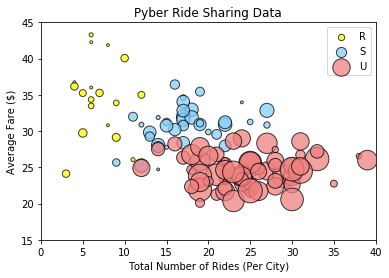

In [8]:
# # The maximum x value for our chart will be 100
# x_limit = 100

# # List of values from 0 to 100 each value being 1 greater than the last
# x_axis = np.arange(0, x_limit, 1)

# # Create a random array of data that we will use for our y values
# data = [random.random() for value in x_axis]
# # Tells matplotlib that we want to make a scatter plot
# # The size of each point on our plot is determined by their x value
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

# from https://matplotlib.org/2.0.2/api/colors_api.html
# b : blue.
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.
############### Compare requireemnts: 
# * Remember when making your plots to consider aesthetics!
#   * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

# from here down is the HW5 stuff, aboive is test and ake sure teh scatter from solved assignments works here

#These lines below run ok but the circle sizes are obviosly wrong, all the same size
# plt.scatter(rural_ridecount, rural_avefare, s=rural_ridecount, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
# plt.scatter(suburban_ridecount, suburban_avefare, s=suburban_ridecount, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
# plt.scatter(urban_ridecount, urban_avefare, s=urban_ridecount, marker="o", facecolors="lightcoral", edgecolors="black",  alpha=0.75)

# changed to driver_count calculation. Does it work? NO.
plt.scatter(rural_ridecount, rural_avefare, s=8*rural_driver_count, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.scatter(suburban_ridecount, suburban_avefare, s=8*suburban_driver_count, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
plt.scatter(urban_ridecount, urban_avefare, s=8*urban_driver_count, marker="o", facecolors="lightcoral", edgecolors="black",  alpha=0.75)


# These lines below run ok but the circle sizes are obviosly wrong, all the same size
# plt.scatter(x_axis, rural_avefare, marker="o", facecolors="red", edgecolors="black",  s=x_axis, alpha=0.75)
# plt.scatter(rural_ridecount, rural_avefare, marker="o", facecolors="red", edgecolors="black",  s=rural_avefare, alpha=0.75)
# plt.scatter(suburban_ridecount, suburban_avefare, marker="o", facecolors="yellow", edgecolors="black",  s=suburban_avefare, alpha=0.75)
# plt.scatter(urban_ridecount, urban_avefare, marker="o", facecolors="blue", edgecolors="black",  s=urban_avefare, alpha=0.75)

# Lines below blow up, lemgths dont line up??
# plt.scatter(rural_ridecount, rural_avefare, marker="o", facecolors="red", edgecolors="black",  s=rural_driver_count, alpha=0.75)
# plt.scatter(suburban_ridecount, suburban_avefare, marker="o", facecolors="yellow", edgecolors="black",  s=suburban_driver_count, alpha=0.75)
# plt.scatter(urban_ridecount, urban_avefare, marker="o", facecolors="blue", edgecolors="black",  s=urban_driver_count, alpha=0.75)



# ************Below -- operations borrowed from solved assignments
# Set the upper and lower limits of our y axis
plt.xlim(0,40)
plt.ylim(15,45)
# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# legend = ["Rural","Suburban"] ## added to fix: this only plots the first three letters...
plt.legend("RSU") # so just apbbreviate
# plt.legend(handles=[Rural,Suburban],loc='best')
# plt.note("Circle size correlates with drivre count per city")

plt.savefig("HW5-Scatter.png")

# ************Above -- operations borrowed from solved assignments



# ************* the starter instructions below....

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

# ************* the starter instructions above....








## Total Fares by City Type

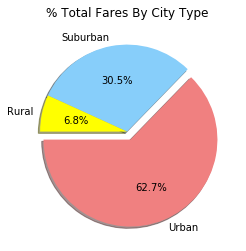

In [9]:
urban_tot_fares    = (df_GB_urban["fare"].sum()).sum()
suburban_tot_fares = (df_GB_suburban["fare"].sum()).sum()
rural_tot_fares    = (df_GB_rural["fare"].sum()).sum()

#
# here is an example of why I am going nuts...
#
# Notice differrence of behavior between...
# urban_tot_fares    = (df_GB_urban["fare"].sum()).sum    -> 
# urban_tot_fares    = (df_GB_urban["fare"].sum()).sum()  -> 

# urban_tot_fares
# suburban_tot_fares
# rural_tot_fares

tot_fares_per_city_type = [urban_tot_fares, suburban_tot_fares, rural_tot_fares]

# tot_fares_per_city_type

cities = ["Urban", "Suburban", "Rural"]

colors = ["lightcoral","lightskyblue","yellow"]

# this blew up ----->  explode = (0, 0.05, 0, 0)
explode = (0.1, 0, 0)

plt.title("% Total Fares By City Type")

plt.pie(tot_fares_per_city_type, labels=cities, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180, explode=explode)
# plt.pie(tot_rides_per_city_type, labels=cities, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)


plt.savefig("HW5-Pie-Fares-By-City-Type.png")


# plt.axis("equal")
# plt.show()


# Calculate Type Percents
# total fares by city type
# summation of all rides to get total fares
# get urban, suburban and rural %ages summation of rides

# Build Pie Chart

# Save Figure

# plt.show()


## Total Rides by City Type

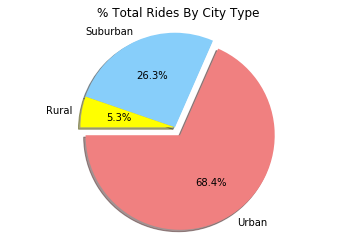

<Figure size 432x288 with 0 Axes>

In [10]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

# Code Next below is total rides by city type

cities = ["Urban", "Suburban", "Rural"]
tot_rides_per_city_type = [len(df_urban),len(df_suburban),len(df_rural)]

colors = ["lightcoral","lightskyblue","yellow"]

# this blew up ----->  explode = (0, 0.05, 0, 0)
explode = (0.1, 0, 0)

plt.title("% Total Rides By City Type")
# plt.pie(tot_rides_per_city_type, explode=explode, labels=cities, colors=colors,
plt.pie(tot_rides_per_city_type, labels=cities, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180, explode=explode)
plt.axis("equal")
plt.show()

plt.savefig("HW5-Pie-Rides-By-City-Type.png")

# Below is from the starterkit

# Calculate Type Percents

# Build Pie Chart

# Show Figure
# plt.show()

# Save Figure



## Total Drivers by City Type

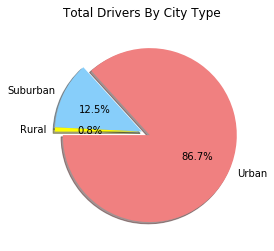

In [11]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure


urban_tot_drivers    = (df_GB_urban["driver_count"].sum()).sum()
suburban_tot_drivers = (df_GB_suburban["driver_count"].sum()).sum()
rural_tot_drivers    = (df_GB_rural["driver_count"].sum()).sum()

#
# here is an example of why I am going nuts...
#
# Notice differrence of behavior between...
# urban_tot_fares    = (df_GB_urban["fare"].sum()).sum    -> 
# urban_tot_fares    = (df_GB_urban["fare"].sum()).sum()  -> 

# urban_tot_fares
# suburban_tot_fares
# rural_tot_fares

tot_drivers_per_city_type = [urban_tot_drivers, suburban_tot_drivers, rural_tot_drivers]

# tot_fares_per_city_type

cities = ["Urban", "Suburban", "Rural"]

colors = ["lightcoral","lightskyblue","yellow"]

# this blew up ----->  explode = (0, 0.05, 0, 0)
explode = (0.1, 0, 0)

plt.title("Total Drivers By City Type")

plt.pie(tot_drivers_per_city_type, labels=cities, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180, explode=explode)
# plt.pie(tot_rides_per_city_type, labels=cities, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

# plt.axis("equal")
# plt.show()

plt.savefig("HW5-Pie-Drivers-By-City-Type.png")

# Calculate Type Percents
# total fares by city type
# summation of all rides to get total fares
# get urban, suburban and rural %ages summation of rides

# Build Pie Chart

# Save Figure

# plt.show()
